In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import sklearn
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
boom= pd.read_csv('day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boom.shape

(730, 16)

In [4]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
boom.drop(['instant','dteday','casual','registered','holiday'],axis=1,inplace=True)
boom.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Year 0 corresponds to 2018.
- Year 1 corresponds to 2019.

The months are displayed in their respective order.

### Visualising the Data

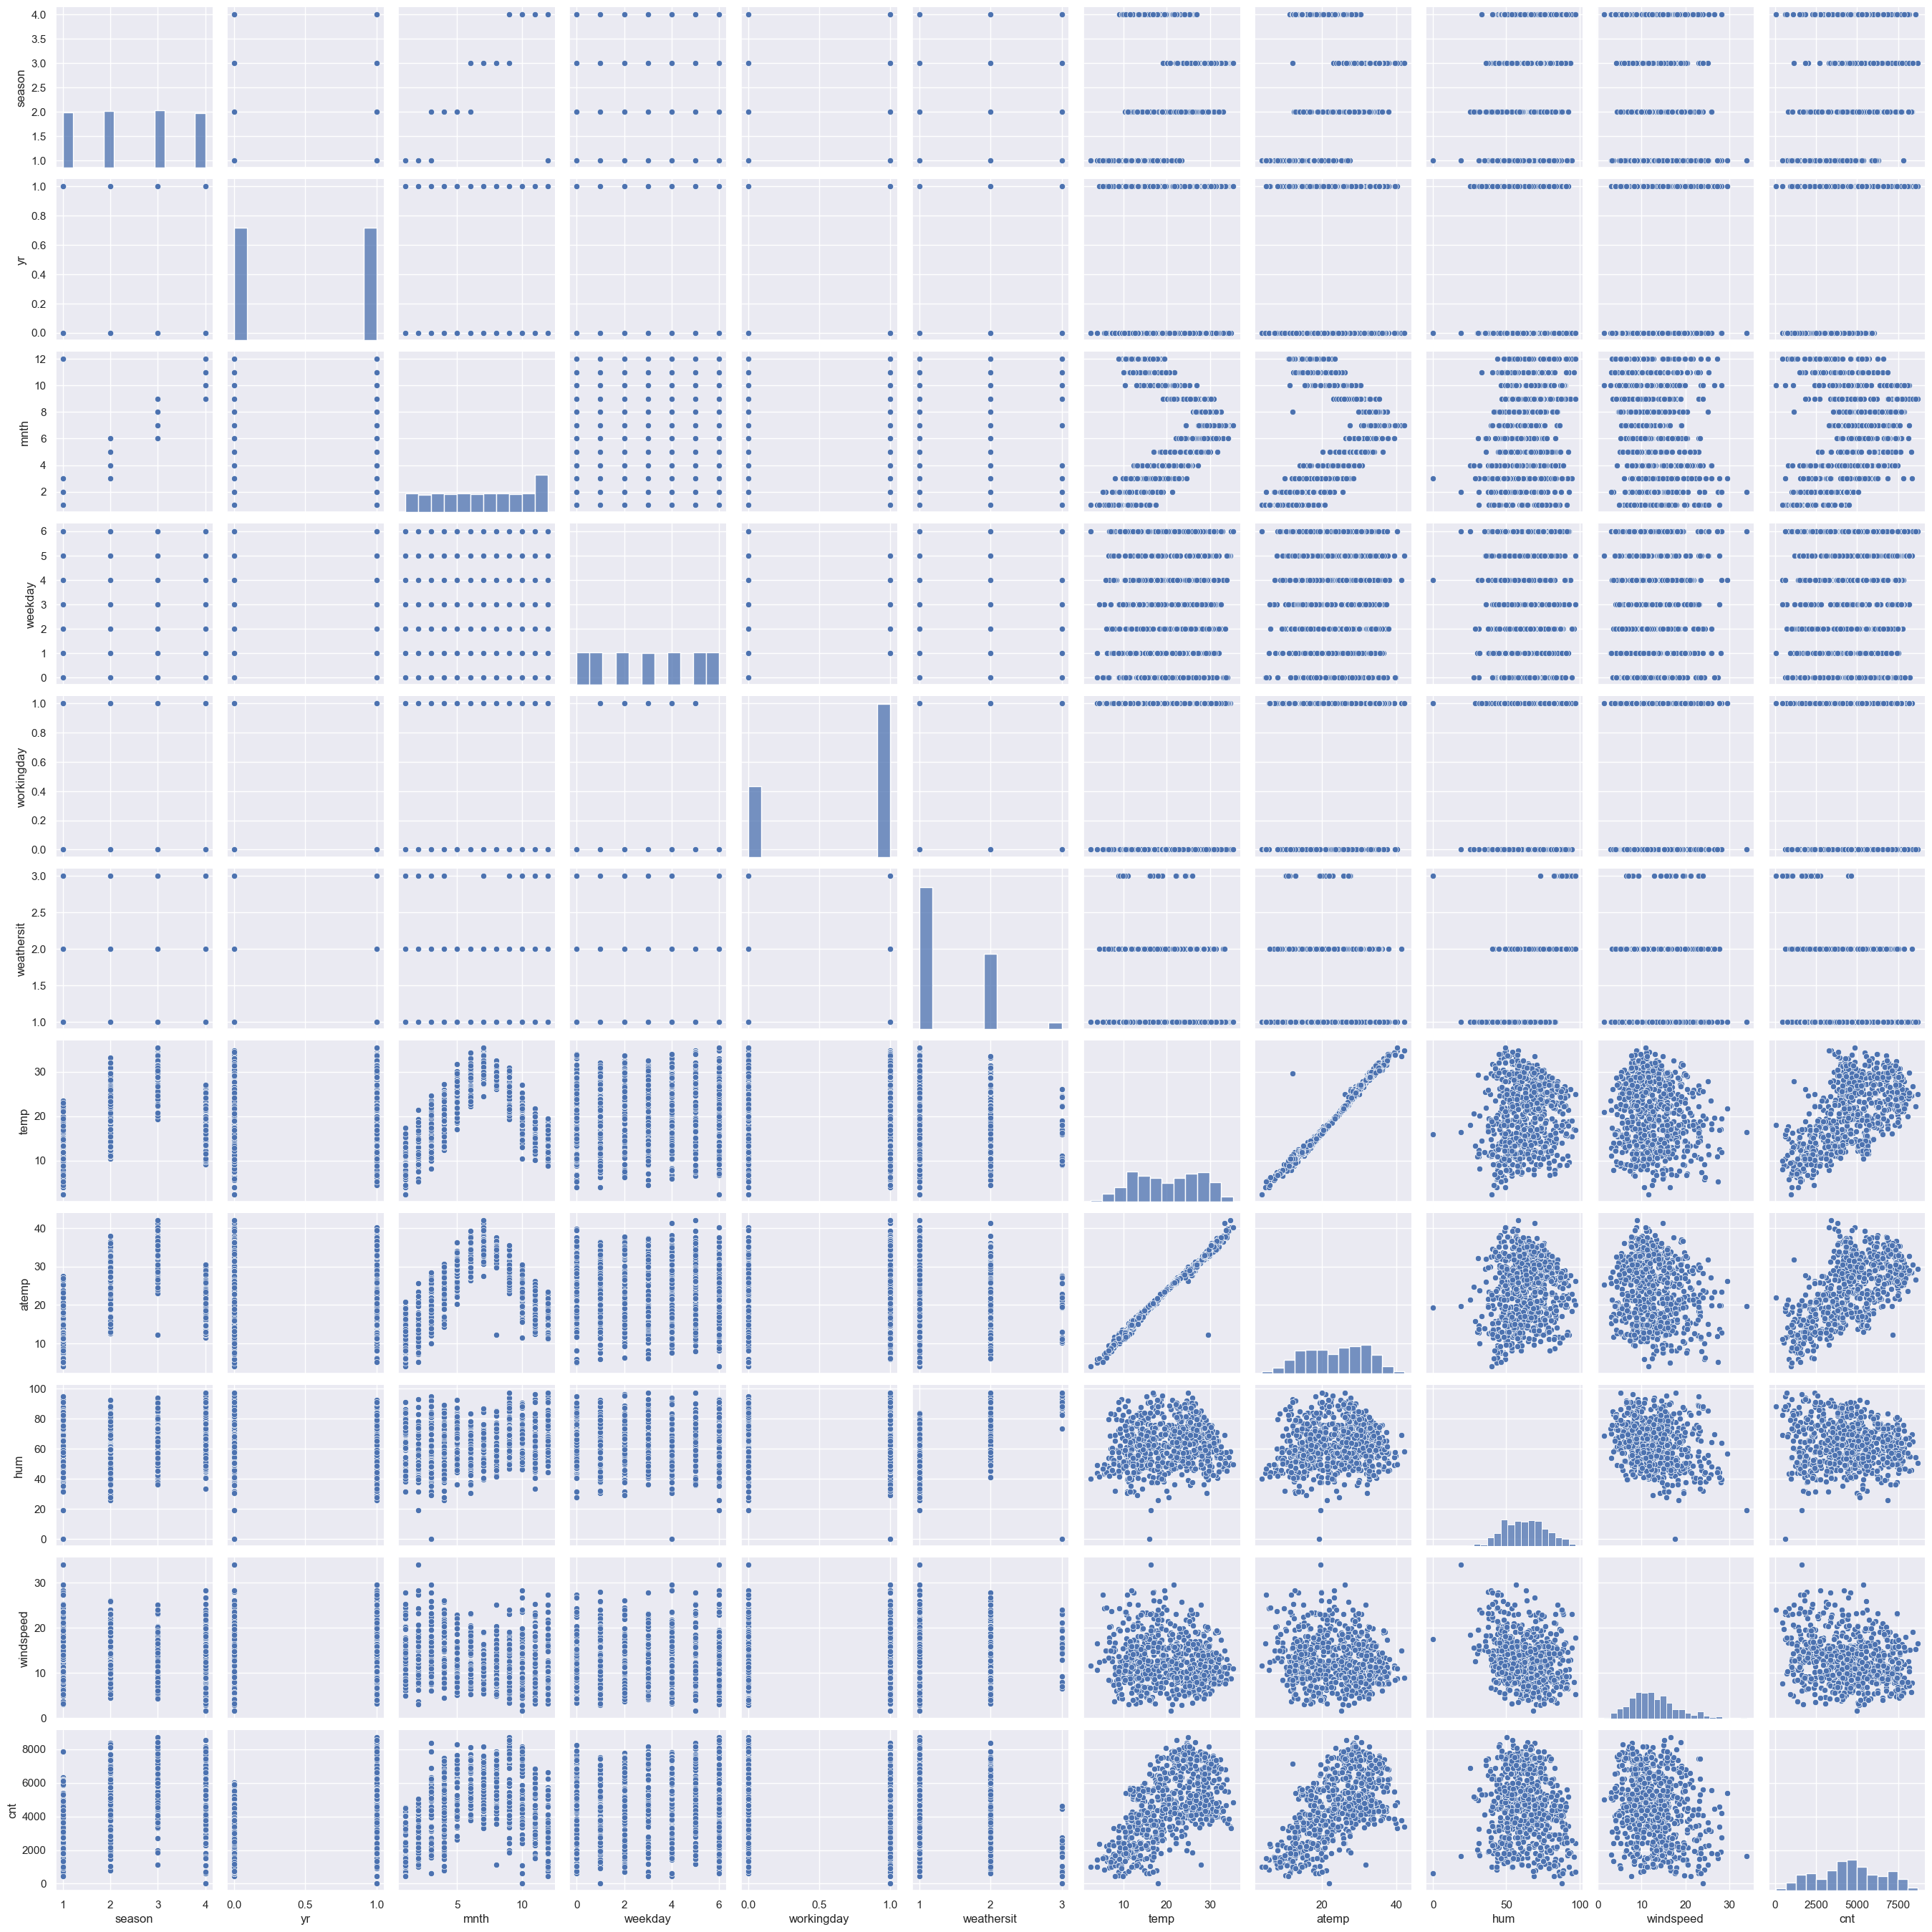

In [7]:
sns.pairplot(boom)
plt.show()

In [8]:
boom.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


- no missing values in the data

In [10]:
boom['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Data conversion for Season

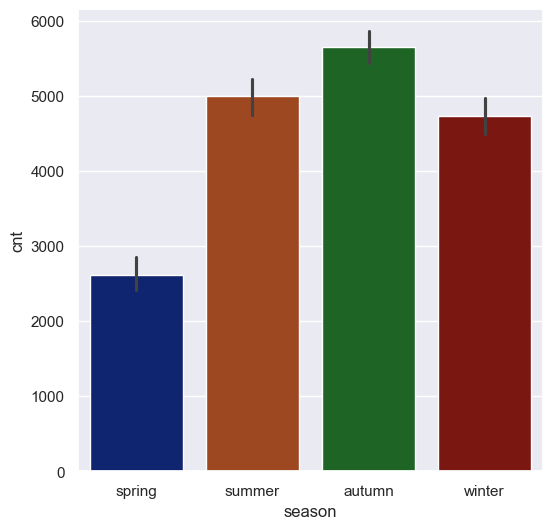

In [11]:
# Mapping numerical season values to their abbreviations
boom['season'] = boom['season'].apply(lambda x: {1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}.get(x, x))

# Creating the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='season', y='cnt', data=boom, palette='dark')
plt.show()

- The autumn season has the highest rent count in bookbike

### Data conversion for Month

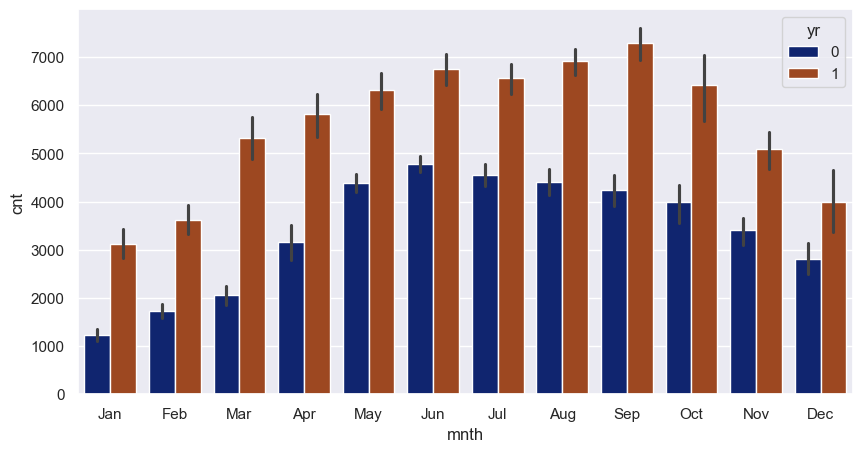

In [12]:
# Mapping numerical month values to their abbreviations
boom['mnth'] = boom['mnth'].apply(lambda x: {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}.get(x, x))
# Creating the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', hue='yr', data=boom, palette='dark')
plt.show()

- The data shows increase in rental from January to September

### Data conversion for Days of the Week

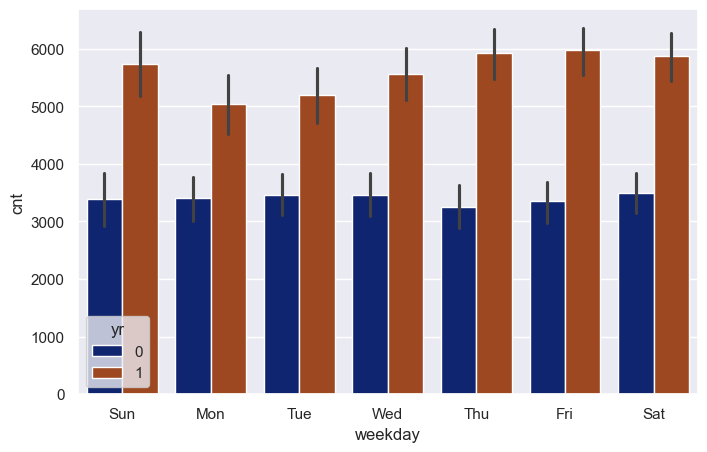

In [13]:
# Mapping numerical weekday values to their abbreviations using a lambda function
boom['weekday'] = boom['weekday'].apply(lambda x: {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}.get(x, x))

# Creating the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', hue='yr', data=boom, palette='dark')
plt.show()

### Data conversion for Year

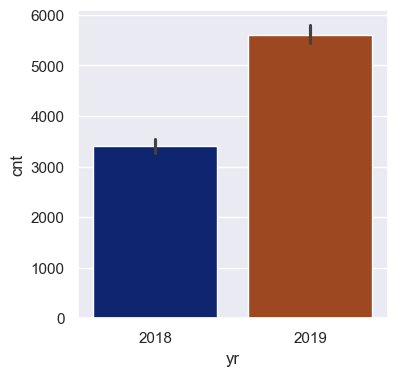

In [14]:
# Mapping numerical year values to their abbreviations using a lambda function
boom['yr'] = boom['yr'].apply(lambda x: {1: 2019, 0: 2018}.get(x, x))

# Creating the bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='yr', y='cnt', data=boom, palette='dark')
plt.show()

- boombike rentals has significantly increased in the year 2019

In [15]:
year = {2019:1,2018:0}
boom.yr=boom.yr.map(year)

### Data conversion for Workday

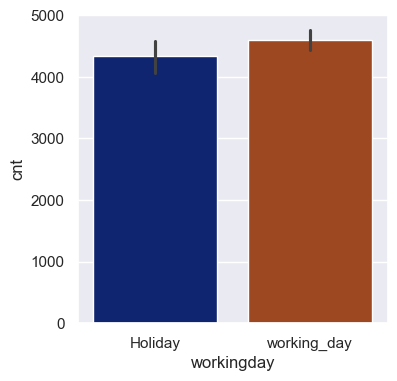

In [16]:
# Mapping numerical year values to their abbreviations using a lambda function
boom['workingday'] = boom['workingday'].apply(lambda x: {1: 'working_day', 0: 'Holiday'}.get(x, x))

# Creating the bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='workingday', y='cnt', data=boom, palette='dark')
plt.show()

### Data conversion for weathersit

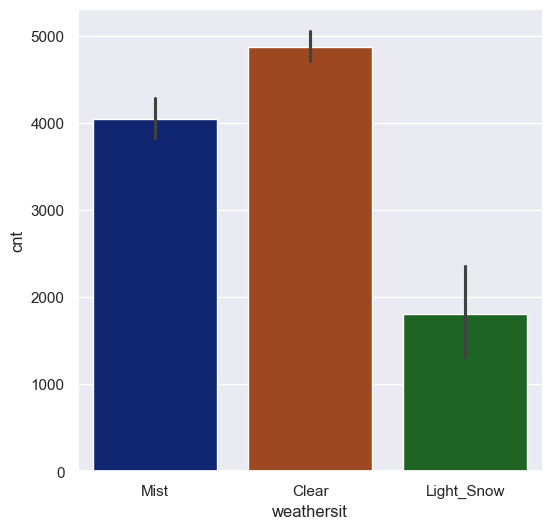

In [17]:
# Mapping numerical weather situation values to their abbreviations using a lambda function
boom['weathersit'] = boom['weathersit'].apply(lambda x: {1: 'Clear', 2: 'Mist', 3: 'Light_Snow', 4: 'Heavy_Rain'}.get(x, x))

# Creating the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='weathersit', y='cnt', data=boom, palette='dark')
plt.show()

- Looks like the riders like to drive during a clear weather

### Renaming the columns based on the data_dictionary

In [18]:
# Renaming the columns for ease to read. 
boom.rename(columns={'hum':'humidity','cnt':'count','yr':'year','mnth':'month'},inplace=True)
boom.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing Categorical Variables

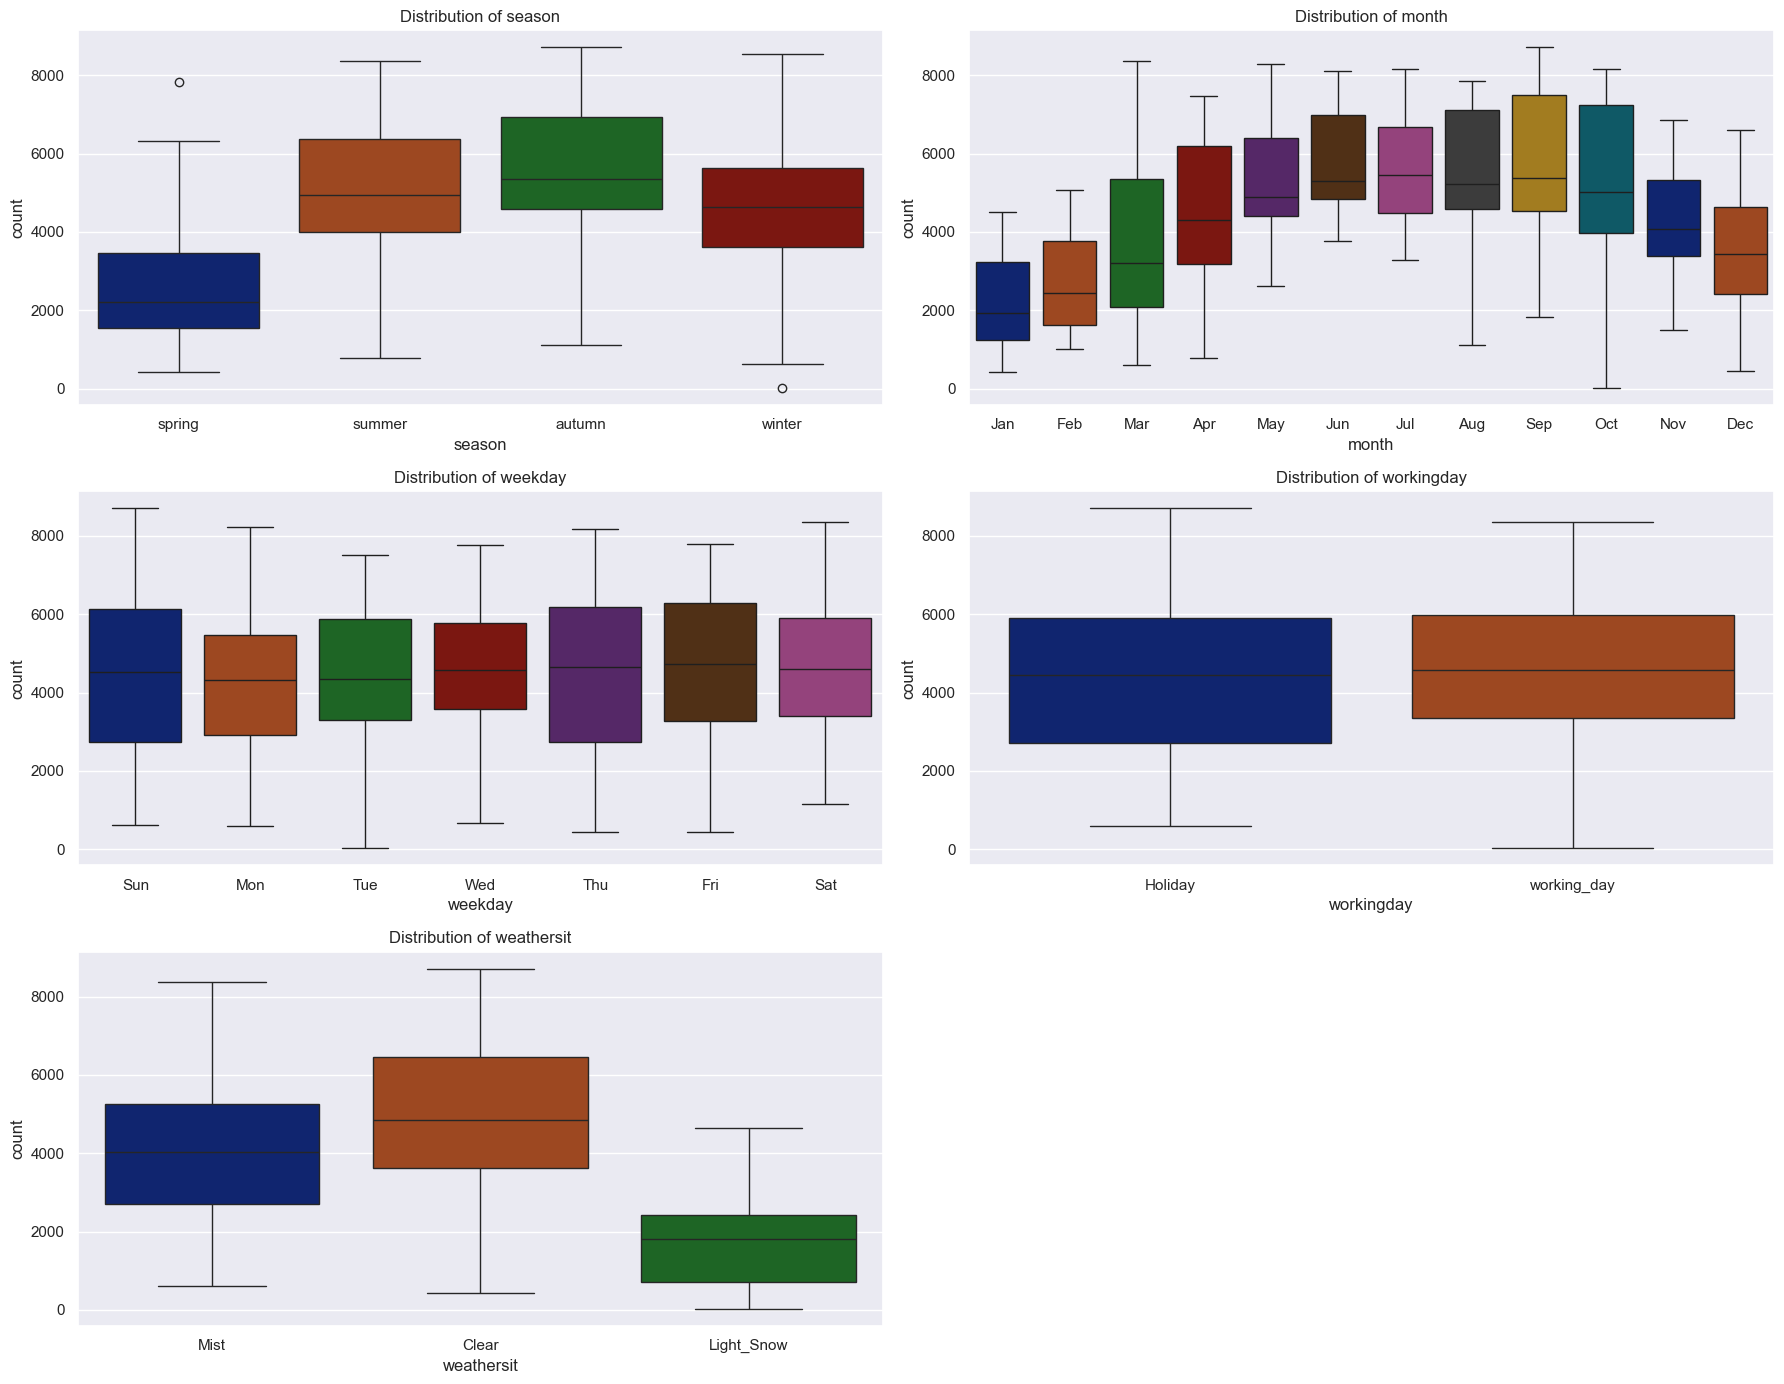

In [19]:
# List of columns and their corresponding titles
columns = ['season', 'month', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(18, 14))

# Creating box plots using enumerate
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=col, y='count', data=boom, palette='dark')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Analysis from boxplots

1. The autumn season has the highest count of rides.
2. The year 2019 saw a higher number of rides.
3. Non-holidays have a higher average number of riders.
4. Weekdays, specifically Tuesday to Friday, have a relatively higher average number of riders.
5. Working days have a marginally higher average number of riders.
6. Clear weather conditions attract significantly more riders, followed by mist and light snow. Heavy rain, however, does not see much ridership.

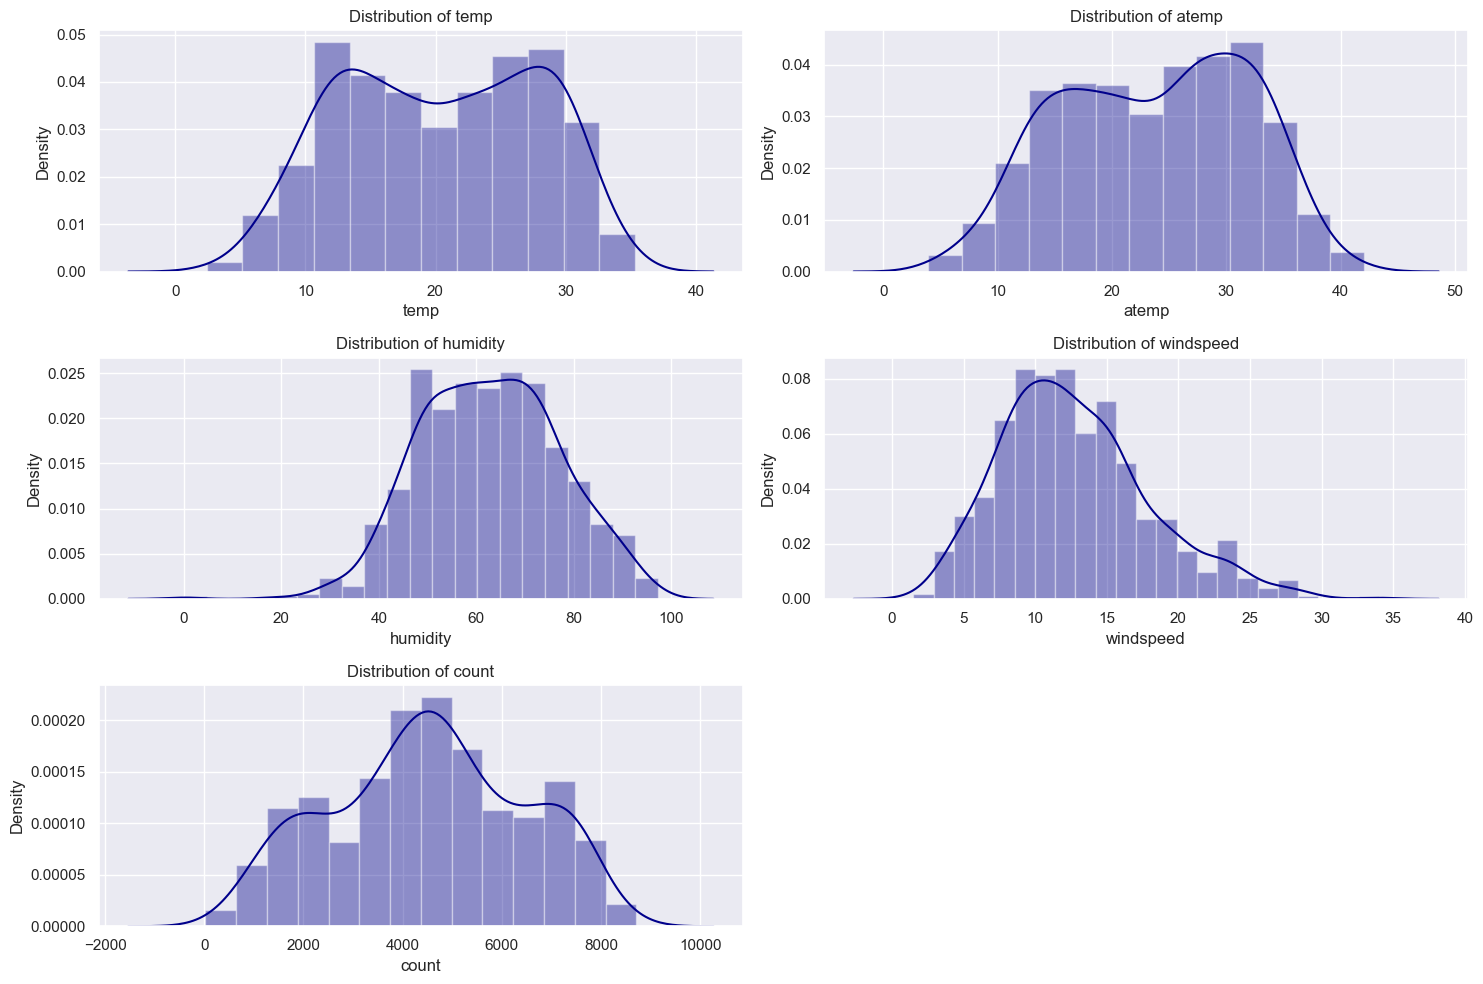

In [20]:
# temp, atemp, hum, windspeed, cnt

# List of columns to plot
columns_to_plot = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Creating distribution plots for each column with a dark palette
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.distplot(boom[column], color='darkblue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [21]:
boom.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data conversion for count

In [22]:
boom['count'] = boom['count'].astype(float)
boom.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985.0
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801.0
2,spring,0,Jan,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349.0
3,spring,0,Jan,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562.0
4,spring,0,Jan,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600.0


#### Now, let's visualise the Numerical variables after all the coversions.

In [23]:
# include only float numbers for visualization.
boom_floatNum= boom.select_dtypes(include=['float64'])

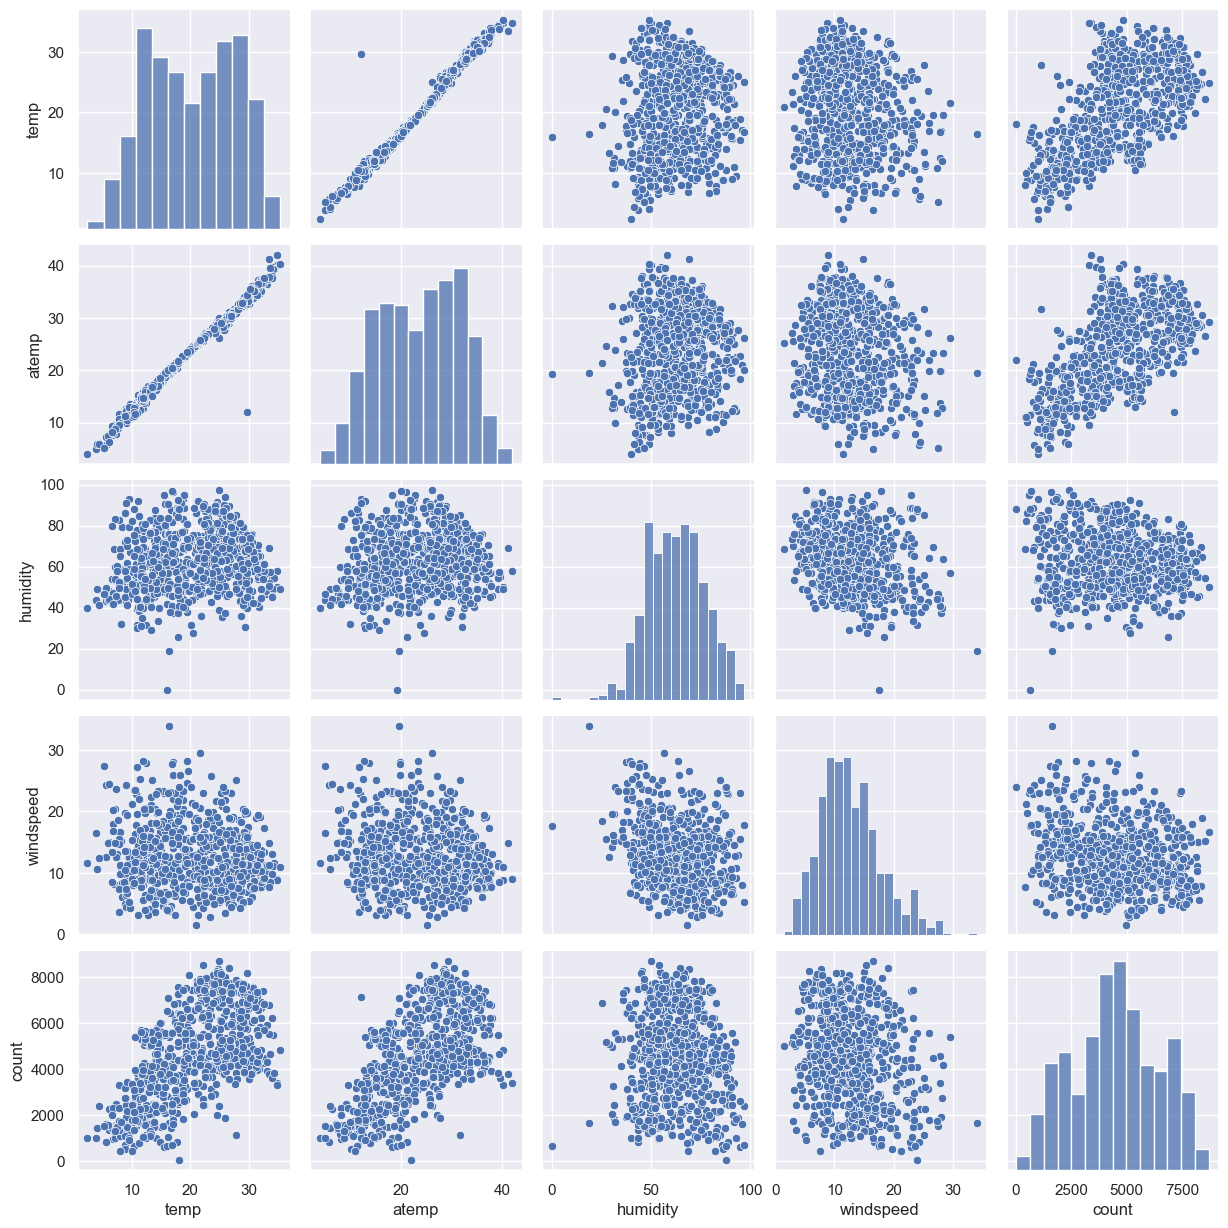

In [24]:
sns.pairplot(boom_floatNum)
plt.show();

### Visualize the correlation with the variables

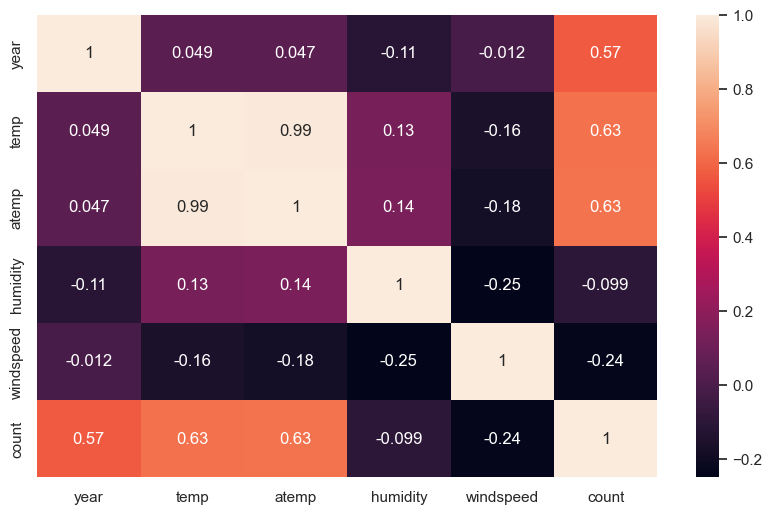

In [25]:
plt.figure(figsize= (10,6))
sns.heatmap(boom.corr(), annot= True)
plt.show()

- Observing the heatmap, it's evident that 'atemp' and 'temp' have a high correlation. Therefore, we can consider dropping one of these variables to avoid redundancy in our analysis.

### Dropping 'atemp' variable from the data

In [26]:
boom.drop('atemp',axis=1,inplace=True)
boom.head()

,season,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600.0


### Dealing with dummy varibles

- Dropping the first level of each categorical feature helps to avoid multicollinearity in regression models. By removing one dummy variable for each categorical feature, we ensure that the remaining dummy variables are independent.

In [27]:
# To create dummy variables and drop the first category
boom_categorical = boom.select_dtypes(exclude=['float64','int64','datetime64'])
boom_dummies = pd.get_dummies(boom_categorical, drop_first=True)
boom_dummies.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [28]:
list(boom_categorical.columns)

['season', 'month', 'weekday', 'workingday', 'weathersit']

In [29]:
# Dropping the categorical columns from boom
boom = boom.drop(list(boom_categorical.columns), axis=1)

# Concatenating the dummy variables with the original DataFrame
boom = pd.concat([boom, boom_dummies], axis=1)

In [30]:
# Displaying the first few rows of the updated boom DataFrame
boom.head()

,year,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
0,0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Splitting into train and test

In [31]:
df_train, df_test= train_test_split(boom, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Rescalling the Features

In [32]:
# Apply MinMax() to all the columns except the'dummy' variables.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
# 1. Instantiate a Scaler object
scaler= MinMaxScaler()

# create a list of numeric vars
num_vars=['temp', 'humidity', 'windspeed', 'count']

# 2. Fit on data
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
576,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [35]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Build the Model

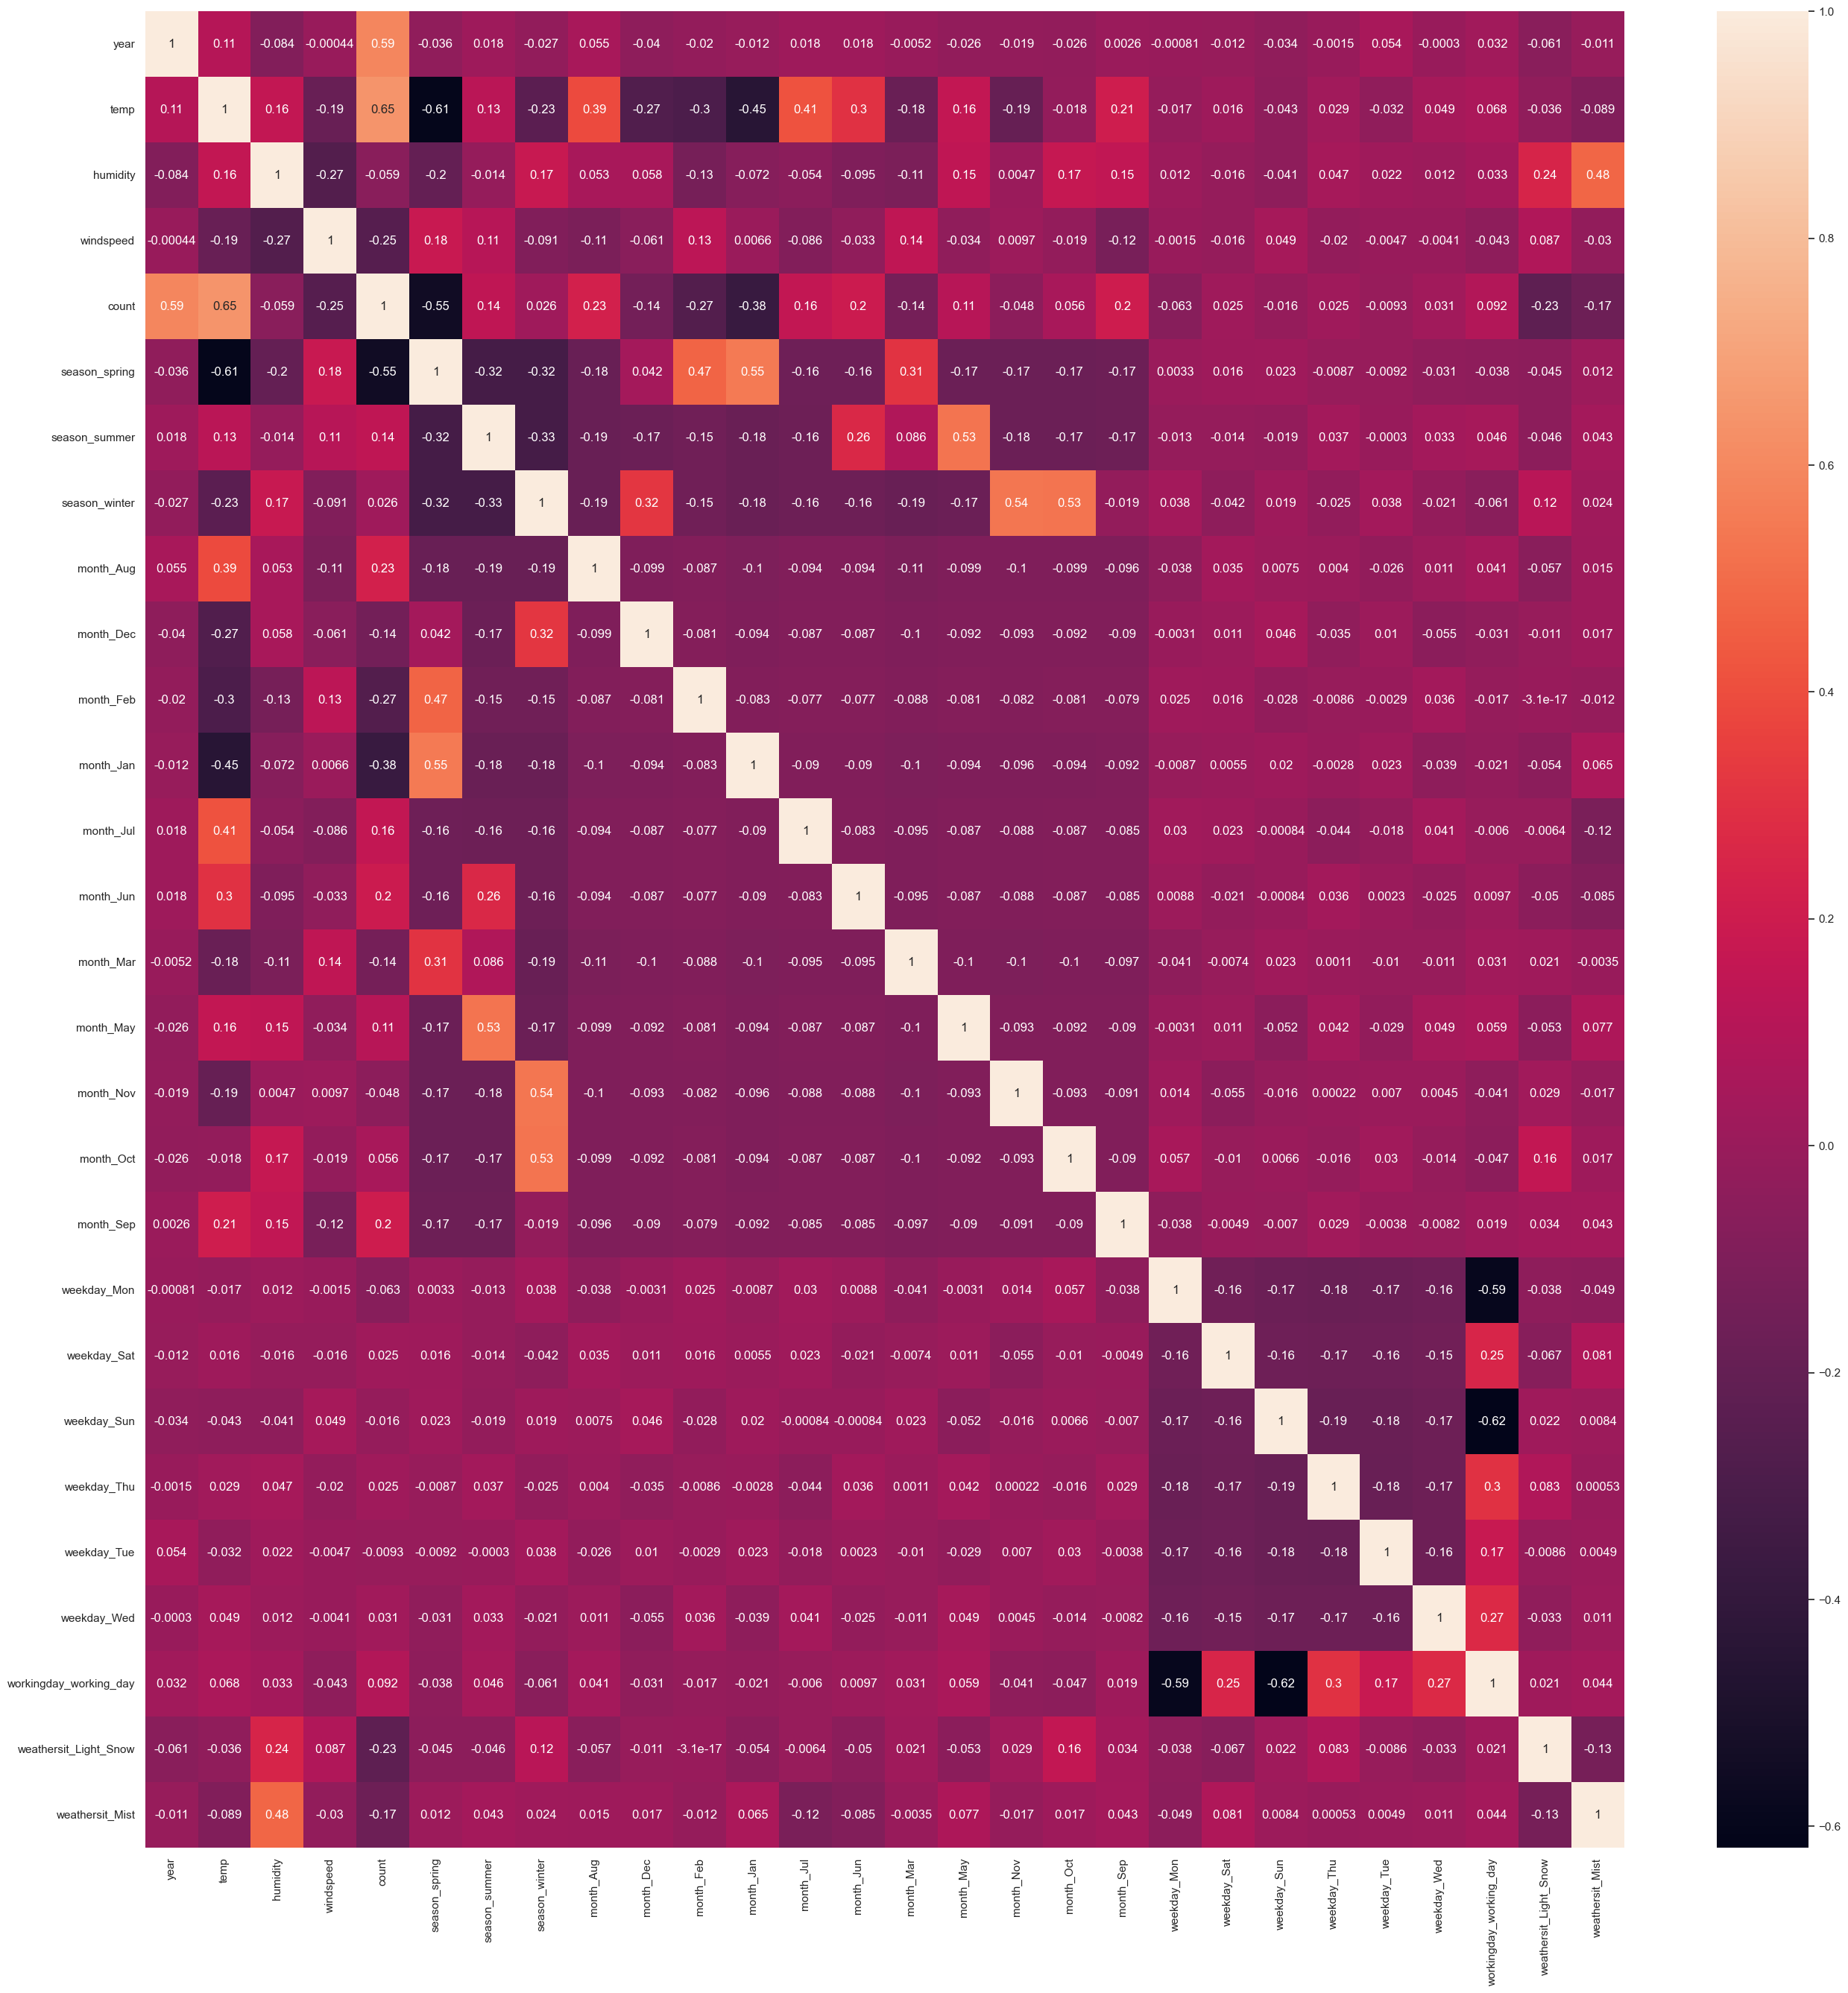

In [36]:
# heatmap
plt.figure(figsize = (32,32))
sns.heatmap(df_train.corr(), annot= True)
plt.show()

In [37]:
df_train.head()

,year,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
576,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [38]:
# X_train, y_train
y_train= df_train.pop('count')
X_train= df_train

In [39]:
X_train.head()

,year,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [40]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

### Step 1

In [41]:
# Add a constant including only temp variable
X_train_sm= sm.add_constant(X_train['temp'])

# Create the first model
lr= sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.46e-61
Time:                        13:23:33   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 2

In [43]:
# Add a constant and including all variables
X_train_sm= sm.add_constant(X_train)

# Create the first model
lr= sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const                     0.244018
year                      0.232438
temp                      0.445359
humidity                 -0.151473
windspeed                -0.186010
season_spring            -0.044834
season_summer             0.043002
season_winter             0.107632
month_Aug                 0.020376
month_Dec                -0.044277
month_Feb                -0.032441
month_Jan                -0.063315
month_Jul                -0.033848
month_Jun                 0.004602
month_Mar                 0.001274
month_May                 0.024673
month_Nov                -0.039879
month_Oct                 0.007546
month_Sep                 0.085938
weekday_Mon               0.040422
weekday_Sat               0.009131
weekday_Sun               0.094642
weekday_Thu               0.003636
weekday_Tue              -0.011800
weekday_Wed              -0.008800
workingday_working_day    0.086134
weathersit_Light_Snow    -0.255835
weathersit_Mist          -0.059551
dtype: float64

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.00e-181
Time:                        13:23:33   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2440      0.052      4.675      0.000       0.141       0.347
year                       0.2324      0.008     28.819      0.000       0.217       0.248
temp                       0.4454      0.046      9.628      0.000       0.354       0.536
humidity                  -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                 -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring             -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer              0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter              0.1076      0.028      3.853      0.000       0.053       0.163
month_Aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
month_Dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
month_Feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
month_Jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
month_Jul                 -0.0338      0.035     -0.969      0.333      -0.102       0.035
month_Jun                  0.0046      0.025      0.186      0.853      -0.044       0.053
month_Mar                  0.0013      0.025      0.052      0.959      -0.047       0.050
month_May                  0.0247      0.021      1.173      0.241      -0.017       0.066
month_Nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
month_Oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
month_Sep                  0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                0.0404      0.030      1.346      0.179      -0.019       0.099
weekday_Sat                0.0091      0.016      0.588      0.557      -0.021       0.040
weekday_Sun                0.0946      0.030      3.163      0.002       0.036       0.153
weekday_Thu                0.0036      0.015      0.248      0.804      -0.025       0.032
weekday_Tue               -0.0118      0.015     -0.780      0.436      -0.042       0.018
weekday_Wed               -0.0088      0.015     -0.571      0.568      -0.039       0.022
workingday_working_day     0.0861      0.027      3.234      0.001       0.034       0.138
weathersit_Light_Snow     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist           -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                    

### Recursive Feature Elimination(RFE)

**Recursive Feature Elimination (RFE)** is a feature selection technique used in machine learning to identify and select the most important features for a predictive model. 

How RFE Works:
- Model Training: An estimator (e.g., a linear model or a decision tree) is trained on the initial set of features.
- Feature Ranking: The importance of each feature is determined based on the model's coefficients or feature importance.
- Feature Elimination: The least important features are removed from the current set of features.
- Iteration: Steps 1-3 are repeated recursively on the reduced set of features until the desired number of features is reached

In [45]:
from sklearn.feature_selection import RFE 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
print(X_train.shape)
print(y_train.shape)

(510, 27)
(510,)


In [48]:
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 6),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 11),
 ('month_Mar', False, 13),
 ('month_May', False, 5),
 ('month_Nov', False, 2),
 ('month_Oct', False, 10),
 ('month_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 8),
 ('workingday_working_day', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [50]:
#getting the selected feature variables in one variable
true_rfe = X_train.columns[rfe.support_]

In [51]:
#checking the values of true_rfe
true_rfe

Index(['year', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Jan', 'month_Jul', 'month_Sep',
       'weekday_Mon', 'weekday_Sun', 'workingday_working_day',
       'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [52]:
len(true_rfe)

15

In [53]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [54]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const                     0.193720
year                      0.230527
temp                      0.509619
humidity                 -0.156299
windspeed                -0.186259
season_spring            -0.050897
season_summer             0.050762
season_winter             0.093301
month_Jan                -0.034512
month_Jul                -0.052918
month_Sep                 0.081395
weekday_Mon               0.058173
weekday_Sun               0.111724
workingday_working_day    0.101508
weathersit_Light_Snow    -0.247464
weathersit_Mist          -0.056318
dtype: float64

In [55]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.22e-191
Time:                        13:23:34   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1937      0.042      4.563      0.000       0.110       0.277
year                       0.2305      0.008     28.795      0.000       0.215       0.246
temp                       0.5096      0.034     14.837      0.000       0.442       0.577
humidity                  -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                 -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer              0.0508      0.015      3.423      0.001       0.022       0.080
season_winter              0.0933      0.017      5.403      0.000       0.059       0.127
month_Jan                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
month_Jul                 -0.0529      0.018     -2.931      0.004      -0.088      -0.017
month_Sep                  0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Mon                0.0582      0.027      2.164      0.031       0.005       0.111
weekday_Sun                0.1117      0.027      4.179      0.000       0.059       0.164
workingday_working_day     0.1015      0.025      4.011      0.000       0.052       0.151
weathersit_Light_Snow     -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist           -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creating Functions as "build_model" and "checkVIF"

In [56]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [57]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,humidity,32.78
1,temp,19.98
12,workingday_working_day,18.57
4,season_spring,5.04
11,weekday_Sun,4.95
3,windspeed,4.92
10,weekday_Mon,4.79
6,season_winter,3.74
5,season_summer,3.05
14,weathersit_Mist,2.31


**How to check the conditions for variables elimination?**

Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

- High p-value, high VIF : definitely drop

- High-Low:

    1. High p, low VIF : remove these first, then build model again and check VIF again
    2. Low p, high VIF : remove these later
- Low p-value, low VIF : keep variable

In [58]:
#humidity variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['humidity'], axis = 1)

In [59]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.60e-188
Time:                        13:23:34   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1179      0.039      3.020      0.003       0.041       0.195
year                       0.2345      0.008     29.009      0.000       0.219       0.250
temp                       0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                 -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer              0.0445      0.015      2.967      0.003       0.015       0.074
season_winter              0.0784      0.017      4.562      0.000       0.045       0.112
month_Jan                 -0.0392      0.018     -2.227      0.026      -0.074      -0.005
month_Jul                 -0.0479      0.018     -2.614      0.009      -0.084      -0.012
month_Sep                  0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Mon                0.0558      0.027      2.042      0.042       0.002       0.109
weekday_Sun                0.1141      0.027      4.198      0.000       0.061       0.167
workingday_working_day     0.1021      0.026      3.971      0.000       0.052       0.153
weathersit_Light_Snow     -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist           -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [61]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,workingday_working_day,16.56
1,temp,13.13
2,windspeed,4.79
10,weekday_Sun,4.54
9,weekday_Mon,4.28
3,season_spring,4.22
5,season_winter,2.79
4,season_summer,2.76
0,year,2.08
6,month_Jan,1.65


In [62]:
#workingday_working_day variable can be dropped due to high VIF
X_train_new_2 = X_train_lr1.drop(['workingday_working_day'], axis = 1)

In [63]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.52e-186
Time:                        13:23:34   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2171      0.030      7.130      0.000       0.157       0.277
year                      0.2350      0.008     28.650      0.000       0.219       0.251
temp                      0.4731      0.034     13.827      0.000       0.406       0.540
windspeed                -0.1586      0.025     -6.289      0.000      -0.208      -0.109
season_spring            -0.0623      0.021     -2.942      0.003      -0.104      -0.021
season_summer             0.0448      0.015      2.945      0.003       0.015       0.075
season_winter             0.0753      0.017      4.324      0.000       0.041       0.109
month_Jan                -0.0401      0.018     -2.244      0.025      -0.075      -0.005
month_Jul                -0.0470      0.019     -2.530      0.012      -0.084      -0.011
month_Sep                 0.0719      0.017      4.255      0.000       0.039       0.105
weekday_Mon              -0.0424      0.012     -3.585      0.000      -0.066      -0.019
weekday_Sun               0.0159      0.011      1.390      0.165      -0.007       0.038
weathersit_Light_Snow    -0.2862      0.025    -11.628      0.000      -0.335      -0.238
weathersit_Mist          -0.0793      0.009     -9.094      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.992
Skew:                          -0.805   Prob(JB):                     3.41e-47
Kurtosis:                       5.734   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [65]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.22
2,windspeed,4.64
3,season_spring,2.78
4,season_summer,2.25
0,year,2.07
5,season_winter,1.82
6,month_Jan,1.61
7,month_Jul,1.60
12,weathersit_Mist,1.56
8,month_Sep,1.33


In [66]:
#windspeed variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['windspeed'], axis = 1)

In [67]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.97e-179
Time:                        13:23:34   Log-Likelihood:                 483.19
No. Observations:                 510   AIC:                            -940.4
Df Residuals:                     497   BIC:                            -885.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1596      0.030      5.295      0.000       0.100       0.219
year                      0.2336      0.009     27.451      0.000       0.217       0.250
temp                      0.4926      0.035     13.928      0.000       0.423       0.562
season_spring            -0.0744      0.022     -3.399      0.001      -0.117      -0.031
season_summer             0.0356      0.016      2.265      0.024       0.005       0.067
season_winter             0.0787      0.018      4.359      0.000       0.043       0.114
month_Jan                -0.0255      0.018     -1.388      0.166      -0.062       0.011
month_Jul                -0.0478      0.019     -2.479      0.014      -0.086      -0.010
month_Sep                 0.0765      0.018      4.366      0.000       0.042       0.111
weekday_Mon              -0.0428      0.012     -3.490      0.001      -0.067      -0.019
weekday_Sun               0.0126      0.012      1.062      0.289      -0.011       0.036
weathersit_Light_Snow    -0.3010      0.025    -11.838      0.000      -0.351      -0.251
weathersit_Mist          -0.0778      0.009     -8.595      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       83.070   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.197
Skew:                          -0.803   Prob(JB):                     3.41e-49
Kurtosis:                       5.815   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [69]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,4.40
0,year,2.07
2,season_spring,2.04
3,season_summer,1.96
4,season_winter,1.62
5,month_Jan,1.60
6,month_Jul,1.59
11,weathersit_Mist,1.56
7,month_Sep,1.33
9,weekday_Sun,1.22


In [70]:
#windspeed variable can be dropped due to low VIF and the p-value
X_train_new_4 = X_train_lr3.drop(['month_Jul'], axis = 1)

In [71]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.19e-179
Time:                        13:23:34   Log-Likelihood:                 480.06
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     498   BIC:                            -885.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1527      0.030      5.062      0.000       0.093       0.212
year                      0.2341      0.009     27.380      0.000       0.217       0.251
temp                      0.4795      0.035     13.641      0.000       0.410       0.549
season_spring            -0.0634      0.022     -2.940      0.003      -0.106      -0.021
season_summer             0.0497      0.015      3.374      0.001       0.021       0.079
season_winter             0.0902      0.018      5.138      0.000       0.056       0.125
month_Jan                -0.0275      0.018     -1.487      0.138      -0.064       0.009
month_Sep                 0.0895      0.017      5.322      0.000       0.056       0.122
weekday_Mon              -0.0441      0.012     -3.577      0.000      -0.068      -0.020
weekday_Sun               0.0119      0.012      1.003      0.316      -0.011       0.035
weathersit_Light_Snow    -0.3021      0.026    -11.819      0.000      -0.352      -0.252
weathersit_Mist          -0.0765      0.009     -8.423      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       84.211   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.723
Skew:                          -0.823   Prob(JB):                     1.94e-48
Kurtosis:                       5.762   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [73]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,3.09
0,year,2.07
2,season_spring,1.93
3,season_summer,1.65
5,month_Jan,1.60
10,weathersit_Mist,1.56
4,season_winter,1.47
6,month_Sep,1.22
7,weekday_Mon,1.21
8,weekday_Sun,1.21


In [74]:
#Jan is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['month_Jan'], axis = 1)

In [75]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.08e-180
Time:                        13:23:34   Log-Likelihood:                 478.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     499   BIC:                            -889.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1427      0.029      4.846      0.000       0.085       0.201
year                      0.2337      0.009     27.311      0.000       0.217       0.250
temp                      0.4923      0.034     14.430      0.000       0.425       0.559
season_spring            -0.0667      0.021     -3.109      0.002      -0.109      -0.025
season_summer             0.0526      0.015      3.600      0.000       0.024       0.081
season_winter             0.0948      0.017      5.480      0.000       0.061       0.129
month_Sep                 0.0900      0.017      5.346      0.000       0.057       0.123
weekday_Mon              -0.0439      0.012     -3.559      0.000      -0.068      -0.020
weekday_Sun               0.0119      0.012      1.000      0.318      -0.011       0.035
weathersit_Light_Snow    -0.3007      0.026    -11.758      0.000      -0.351      -0.250
weathersit_Mist          -0.0772      0.009     -8.494      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       82.260   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.187
Skew:                          -0.806   Prob(JB):                     3.09e-47
Kurtosis:                       5.736   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [77]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,3.06
0,year,2.06
3,season_summer,1.64
9,weathersit_Mist,1.55
4,season_winter,1.47
2,season_spring,1.37
5,month_Sep,1.22
6,weekday_Mon,1.21
7,weekday_Sun,1.21
8,weathersit_Light_Snow,1.07


**Several points to be noted as we select this model as the final model:**

- **Model Selection Criteria**: The selection of the model is based on various factors such as the p-value, the Variance Inflation Factor (VIF), and the R-squared value. The p-value indicates the significance of the variables, the VIF shows the correlation between the participating variables, and the R-squared value indicates the model's strength. The R-squared value defines the percentage of the variance in the dependent variable that the independent variables collectively explain.

- **Significance of Variables**: The low (<0.05) or almost zero p-value of all the selected variables allows us to reject the null hypothesis, indicating that these variables are statistically significant.

- **Multicollinearity Check**: The VIF should generally be less than 5, and we have achieved this condition with all the variables, indicating low multicollinearity.

- **Model Strength**: The R-squared value achieved is 82.2%, suggesting a high correlation between the dependent and independent variables. The selected variables accurately help us explain the variance of the dependent variable, i.e., the count.

### Residual analysis

**Residual analysis** is an essential step in evaluating the performance of a regression model. It involves examining the residuals (the differences between observed and predicted values) to ensure that the model assumptions are met and to identify any potential issues.

In [78]:
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,year,temp,season_spring,season_summer,season_winter,month_Sep,weekday_Mon,weekday_Sun,weathersit_Light_Snow,weathersit_Mist
576,1.0,1,0.815169,0,0,0,0,0,0,0,0
426,1.0,1,0.442393,1,0,0,0,0,1,0,1
728,1.0,1,0.245101,1,0,0,0,1,0,0,0
482,1.0,1,0.395666,0,1,0,0,0,1,0,1
111,1.0,0,0.345824,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,1,0,0,0,0,0,0,0
350,1.0,0,0.248216,0,0,1,0,0,1,0,1
79,1.0,0,0.462664,0,1,0,0,0,0,0,1


In [79]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

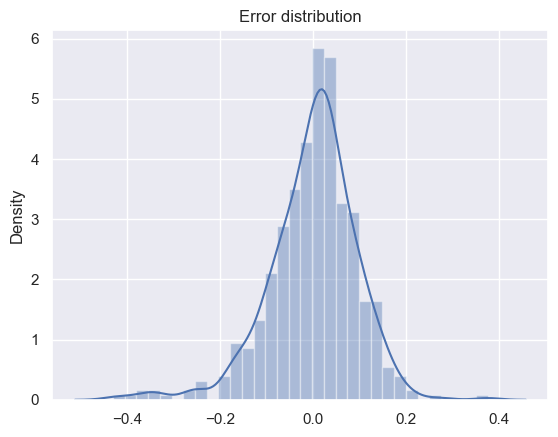

In [80]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

### Making Predictions on the testing set

In [81]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
num_vars

['temp', 'humidity', 'windspeed', 'count']

In [82]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [83]:
df_test.describe()

,year,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.700000,0.027273,0.318182
std,0.500809,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.459303,0.163248,0.466833
min,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#building test model and preparing the variables for model building
y_test = df_test.pop('count')
X_test = df_test

In [85]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [86]:
X_test.head(5)

,year,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,...,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light_Snow,weathersit_Mist
184,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
221,0,0.881625,0.437098,0.339570,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
152,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
#Printing feature variables
X_train_lr5.columns

Index(['const', 'year', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'month_Sep', 'weekday_Mon', 'weekday_Sun',
       'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [88]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [89]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [90]:
#making predictions
y_pred = lr_model.predict(X_test_new)

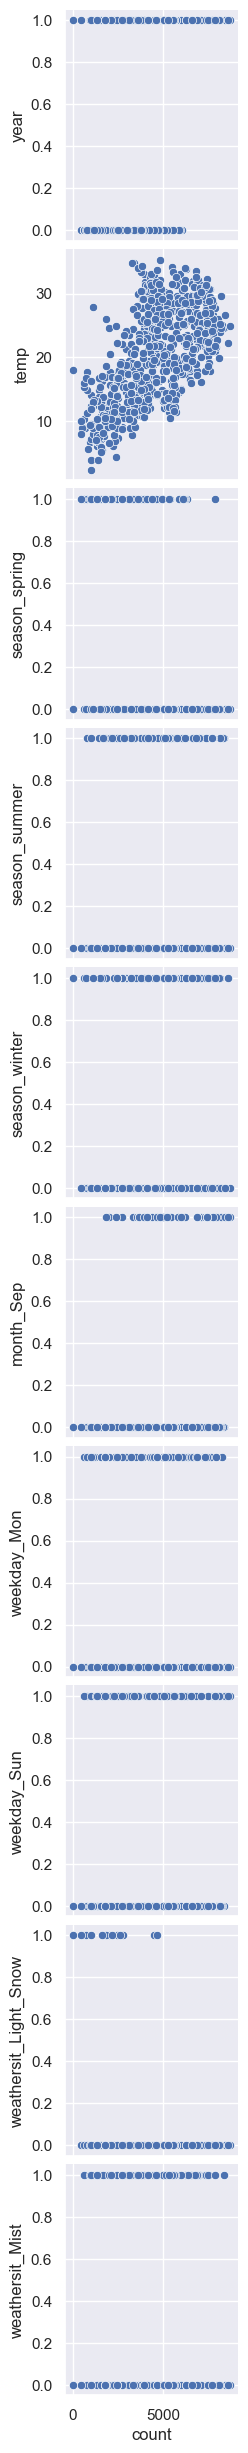

In [91]:
#build a scatter plot to observe the relationship between the dependent and the feature variables
sns.pairplot(boom, y_vars=X_train_lr5.columns, x_vars='count')
plt.show()

**Let's summarize the validation of the linear regression assumptions for our model**:

- **Linearity**:
The variable temp shows a linear relationship with the dependent variable count. This satisfies the linearity assumption of linear regression.

- **Multicollinearity**:
As previously observed, every variable in our chosen model has a VIF < 5. This ensures that there is no multicollinearity among the independent variables.

- **Normality of Errors**:
The error distribution is normal, with errors concentrated around 0. This satisfies the normality assumption of linear regression.

These validations confirm that our model meets the key assumptions of linear regression, making it a reliable model for predicting the dependent variable count.

### Prediction and evaluation of the test set

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [93]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8091827435956835


In [94]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8219321395218384


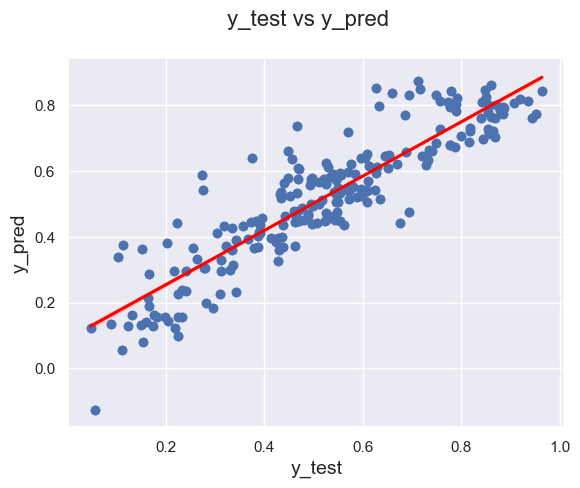

In [95]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

Equation of the best fitted line is:

    count = 0.2337xyear + 0.4923xtemp- 0.0667xseason_spring + 0.0526xseason_summer + 0.0948xseason_winter + 0.0900xmonth_Sep -0.0439xweekday_Mon + 0.0119xweekday_Sun - 0.3007xweathersit_Light_Snow - 0.0772xweathersit_Mist + 0.1427

In [96]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00895075303820609
Mean squared error of the test set is 0.009123789632563528


A mean squared error (MSE) close to 0 indicates that the model's predictions are very close to the actual values, both in the training and testing datasets. This suggests that the model has high predictive accuracy and effectively captures the variance in the dependent variable.

**Summary**:

The summary of the model after data interpretation, visualization, data preparation, model building and training, residual analysis, and evaluation of the test model is as follows:

- **Model Performance**:
The R-squared value for the training set is 82.19%, while the test set has a value of 80.91%. This suggests that our model explains the variance quite accurately on the test set, indicating it is a good model.

- **Mean Squared Error**:
The model's mean squared error is almost 0 on both the training and testing datasets, suggesting that the variance is accurately predicted on the test set. The p-values and VIF were used to select significant variables, and RFE was conducted for the automated selection of variables.

- **Key Findings**:
The bike demand for BoomBikes is dependent on temperature and whether it is a working day or not. More rentals are demanded in winter compared to summer and spring. The months of September and October had higher rental usage. In terms of days, the focus was on Wednesdays, Thursdays, and Saturdays, with more rentals on holidays.

- **Insights and Recommendations**:
These interpretations provide meaningful insights into the bike rental market and user behavior. One recommendation is to implement aggressive marketing in the summer and spring seasons to drive up rentals. Since summer months show low rental levels, a strong marketing strategy for the first six months of the year can help increase rental numbers. Additionally, introducing incentives or strategic deals on days with less clear weather can attract more users. Rentals were higher in 2019 than in 2018, suggesting that over time, more people are adopting this service. Therefore, a strong analysis should be conducted to retain repeat customers.